In [86]:
import numpy as np
import pandas as pd

from tabulate import tabulate
import warnings
warnings.filterwarnings(action='ignore')

import re
import zipfile

import seaborn as sns

In [87]:
zipfile_name = "stack-overflow-developer-survey-2023.zip"

with zipfile.ZipFile(zipfile_name,"r") as file:
    file.extractall()

In [88]:
data=pd.read_csv('survey_results_public.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [89]:
def check(data):
    list=[]
    for col in data.columns:
        columns = data.columns
        dtype = data[col].dtypes
        instances = data[col].count()
        unique = data[col].nunique()
        sum_null = data[col].isnull().sum()
        duplicates = data[col].duplicated().sum()
        list.append([dtype,instances,unique,sum_null,duplicates])
    data_check = pd.DataFrame(list,columns=["dtype","instances","unique","sum_null","duplicates"],index=data.columns)
    return data_check

def check_unique(data):
    nunique = data.apply(lambda x: x.nunique())
    unique_values = data.apply(lambda x: x.unique())
    data_check = pd.DataFrame({'unique_count':nunique,'unique_values0':unique_values})
    return data_check

def col_order(data,col_des,col):
    col_index=data.columns.get_loc(col_des)
    data.insert(col_index,col,data.pop(col))
    return data



In [90]:
check(data)

dtype  instances  unique  sum_null  duplicates
ResponseId             int64      89184   89184         0           0
Q120                  object      89184       1         0       89183
MainBranch            object      89184       6         0       89178
Age                   object      89184       8         0       89176
Employment            object      87898     106      1286       89077
...                      ...        ...     ...       ...         ...
ProfessionalTech      object      41783     284     47401       88899
Industry              object      36774      12     52410       89171
SurveyLength          object      86485       3      2699       89180
SurveyEase            object      86554       3      2630       89180
ConvertedCompYearly  float64      48019    8784     41165       80399

[84 rows x 5 columns]

In [91]:
check_unique(data)

unique_count  \
ResponseId                  89184   
Q120                            1   
MainBranch                      6   
Age                             8   
Employment                    106   
...                           ...   
ProfessionalTech              284   
Industry                       12   
SurveyLength                    3   
SurveyEase                      3   
ConvertedCompYearly          8784   

                                                                                                                                                                                                                                                                                                                  unique_values0  
ResponseId           [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, ...  
Q120                                                                                                                                                                                                                                                                                                                   [I agree]  
MainBranch                                                                  [None of these, I am a developer by profession, I am not primarily a developer, but I write code sometimes as part of my work/studies, I code primarily as a hobby, I am learning to code, I used to be a developer by profession, but no longer am]  
Age                                                                                                                                                                              [18-24 years old, 25-34 years old, 45-54 years old, 35-44 years old, Under 18 years old, 55-64 years old, 65 years or older, Prefer not to say]  
Employment           [nan, Employed, full-time, Employed, full-time;Independent contractor, freelancer, or self-employed, Not employed, but looking for work, Independent contractor, freelancer, or self-employed, Student, full-time, Independent contractor, freelancer, or self-employed;Employed, part-time;Student, par...  
...                                                                                                                                                                                                                                                                                                                          ...  
ProfessionalTech     [nan, DevOps function;Microservices;Automated testing;Observability tools, DevOps function;Microservices;Automated testing;Observability tools;Innersource initiative;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more often) continuous delivery, ...  
Industry                                [nan, Information Services, IT, Software Development, or other Technology, Other, Financial Services, Manufacturing, Transportation, or Supply Chain, Retail and Consumer Services, Higher Education, Legal Services, Insurance, Healthcare, Oil & Gas, Wholesale, Advertising Services]  
SurveyLength                                                                                                                                                                                                                                                                   [nan, Appropriate in length, Too long, Too short]  
SurveyEase                                                                                                                                                                                                                                                                    [nan, Easy, Neither easy nor difficult, Difficult]  
ConvertedCompYearly  [n

In [92]:
data.describe()

ResponseId                                         CompTotal  WorkExp  \
count     89184.0                                           48225.0  43579.0   
mean      44592.5     1036806635562467391394372602402550216392704.0     11.4   
std       25745.3   227684720124393382684674544505631345205051392.0      9.1   
min           1.0                                               0.0      0.0   
25%       22296.8                                           63000.0      5.0   
50%       44592.5                                          115000.0      9.0   
75%       66888.2                                          230000.0     16.0   
max       89184.0 49999999999999992051087350427974655758076739584.0     50.0   

       ConvertedCompYearly  
count              48019.0  
mean              103110.1  
std               681418.8  
min                    1.0  
25%                43907.0  
50%                74963.0  
75%               121641.0  
max             74351432.0

In [93]:
data.head()

ResponseId     Q120                      MainBranch              Age  \
0           1  I agree                   None of these  18-24 years old   
1           2  I agree  I am a developer by profession  25-34 years old   
2           3  I agree  I am a developer by profession  45-54 years old   
3           4  I agree  I am a developer by profession  25-34 years old   
4           5  I agree  I am a developer by profession  25-34 years old   

                                                                 Employment  \
0                                                                       NaN   
1                                                       Employed, full-time   
2                                                       Employed, full-time   
3                                                       Employed, full-time   
4  Employed, full-time;Independent contractor, freelancer, or self-employed   

                             RemoteWork  \
0                                   NaN   
1                                Remote   
2  Hybrid (some remote, some in-person)   
3  Hybrid (some remote, some in-person)   
4                                Remote   

                                                                                                                        CodingActivities  \
0                                                                                                                                    NaN   
1  Hobby;Contribute to open-source projects;Bootstrapping a business;Professional development or self-paced learning from online courses   
2                                                              Hobby;Professional development or self-paced learning from online courses   
3                                                                                                                                  Hobby   
4                           Hobby;Contribute to open-source projects;Professional development or self-paced learning from online courses   

                                        EdLevel  \
0                                           NaN   
1  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                                                                                                                                                                                                                    LearnCode  \
0                                                                                                                                                                                                                                         NaN   
1  Books / Physical media;Colleague;Friend or family member;Hackathons (virtual or in-person);Online Courses or Certification;On the job training;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)   
2                                                                                            Books / Physical media;Colleague;On the job training;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)   
3                                                                                                               Colleague;Friend or family member;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)   
4                                                                                          Books / Physical media;Online Courses or Certification;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)   

                                                                                                                                                                                                                               

In [94]:
data.columns.to_list()

['ResponseId',
 'Q120',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'LearnCodeCoursesCert',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'TechList',
 'BuyNewTool',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHaveWorkedWith',
 'OfficeStackAsyncWantToWorkWith',
 'OfficeStackSyncHaveWorkedWith',
 'OfficeStackSyncWantToWorkWith',
 'AISearchHaveWorkedWith',
 'AISearchWantToWorkWith',
 'AIDevHaveWorkedWith',
 'AIDevWantToWorkWith',
 'NEWSO

In [95]:
pd.options.display.float_format = '{:.1f}'.format

In [96]:
data.groupby("Industry")["CompTotal"].mean().sort_values(ascending=False)

Industry
Information Services, IT, Software Development, or other Technology   740535746435.3
Wholesale                                                                 34185382.8
Financial Services                                                        25103720.3
Oil & Gas                                                                 24856021.4
Manufacturing, Transportation, or Supply Chain                            23024009.4
Advertising Services                                                      21051298.8
Insurance                                                                 19944606.7
Legal Services                                                             8955198.8
Retail and Consumer Services                                               7419877.2
Healthcare                                                                 4936682.5
Other                                                                      3236244.0
Higher Education                                        

In [97]:
pd.set_option('display.max_rows',None)

In [98]:
data.groupby(["Industry","DevType"])["CompTotal"].mean().sort_values(ascending=False)

Industry                                                             DevType                                      
Information Services, IT, Software Development, or other Technology  Research & Development role                     41493780760085.8
Financial Services                                                   Scientist                                           3000018000.0
Advertising Services                                                 Hardware Engineer                                    900000000.0
Oil & Gas                                                            Other (please specify):                              715709714.3
Manufacturing, Transportation, or Supply Chain                       Cloud infrastructure engineer                        342998642.9
Information Services, IT, Software Development, or other Technology  Developer, QA or test                                206863556.1
Advertising Services                                                 Project mana

In [99]:
pd.reset_option('display.max_rows')

In [100]:
data[data['Industry'].isnull()==False][["Industry","DevType","CompTotal"]].sort_values('CompTotal',ascending=False).head(5)

Industry  \
49553  Information Services, IT, Software Development, or other Technology   
56853  Information Services, IT, Software Development, or other Technology   
75523                                                   Financial Services   
33581  Information Services, IT, Software Development, or other Technology   
76349                                                 Advertising Services   

                           DevType           CompTotal  
49553  Research & Development role 10000000000000000.0  
56853        Developer, QA or test       19800000000.0  
75523          Developer, back-end       16000000000.0  
33581        Developer, full-stack       12000000000.0  
76349        Developer, full-stack       10000000000.0

In [101]:
data.RemoteWork.unique()

array([nan, 'Remote', 'Hybrid (some remote, some in-person)', 'In-person'],
      dtype=object)

In [102]:
remote_data=data[~data['RemoteWork'].isin(['In-person', np.nan])]["ResponseId"].count()
inperson_data = data[~data['RemoteWork'].isin(['Remote',np.nan])]["ResponseId"].count()

remote_inperson_ratio = remote_data/inperson_data
remote_proportion = remote_data/data[data['RemoteWork'].isnull()==False]["ResponseId"].count()*100

print(f'Remote to In-Person Ratio: {remote_inperson_ratio:.2f}\n'
      f'Remote Proportion of Total: {remote_proportion:.2f}%')

Remote to In-Person Ratio: 1.43
Remote Proportion of Total: 83.59%


In [103]:
data.columns.to_list()

['ResponseId',
 'Q120',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'LearnCodeCoursesCert',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'TechList',
 'BuyNewTool',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHaveWorkedWith',
 'OfficeStackAsyncWantToWorkWith',
 'OfficeStackSyncHaveWorkedWith',
 'OfficeStackSyncWantToWorkWith',
 'AISearchHaveWorkedWith',
 'AISearchWantToWorkWith',
 'AIDevHaveWorkedWith',
 'AIDevWantToWorkWith',
 'NEWSO

In [104]:
data[(data['YearsCodePro'].isnull()==True) & (data['CompTotal'].isnull()==False)][['YearsCode','YearsCodePro','CompTotal']]

YearsCode YearsCodePro  CompTotal
595          22          NaN    55000.0
1117         20          NaN   100000.0
1496         15          NaN   270000.0
1586          6          NaN   172000.0
1679         32          NaN    82113.0
...         ...          ...        ...
86256        17          NaN   135000.0
86331       NaN          NaN 12000000.0
87401         4          NaN      300.0
87513       NaN          NaN   372000.0
88782         6          NaN    26000.0

[202 rows x 3 columns]

In [105]:
data[data['YearsCode']=='Less than 1 year']['YearsCode']

24       Less than 1 year
79       Less than 1 year
105      Less than 1 year
156      Less than 1 year
752      Less than 1 year
               ...       
88861    Less than 1 year
88897    Less than 1 year
88974    Less than 1 year
89096    Less than 1 year
89149    Less than 1 year
Name: YearsCode, Length: 968, dtype: object

In [106]:
corr_exp_data=data[['YearsCode', 'YearsCodePro']].apply(pd.to_numeric, errors='coerce').merge(data[['CompTotal','Industry']],how='inner',left_index=True,right_index=True)

corr_exp_data['TotalYearsCode'] = corr_exp_data['YearsCode']+corr_exp_data['YearsCodePro']

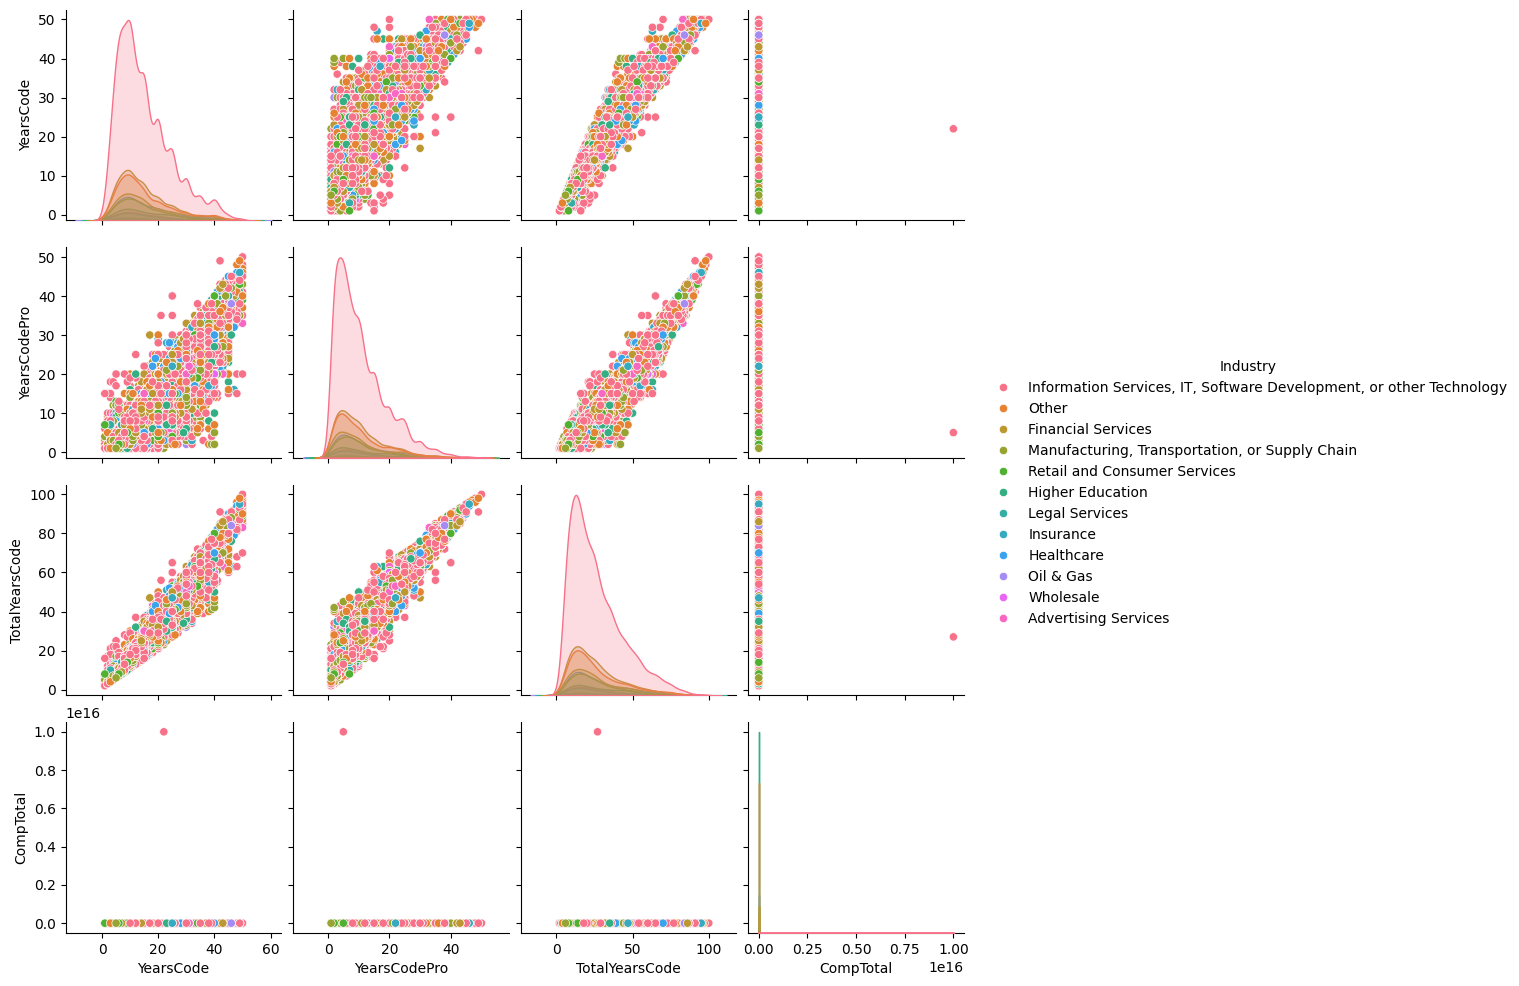

In [107]:
sns.pairplot(data=corr_exp_data,
             x_vars=['YearsCode','YearsCodePro','TotalYearsCode','CompTotal'],
             y_vars=['YearsCode','YearsCodePro','TotalYearsCode','CompTotal'],hue='Industry',markers='o')

In [108]:
col_order(corr_exp_data,'CompTotal','TotalYearsCode')

YearsCode  YearsCodePro  TotalYearsCode    CompTotal  \
0            NaN           NaN             NaN          NaN   
1           18.0           9.0            27.0     285000.0   
2           27.0          23.0            50.0     250000.0   
3           12.0           7.0            19.0     156000.0   
4            6.0           4.0            10.0    1320000.0   
...          ...           ...             ...          ...   
89179       20.0           5.0            25.0     200000.0   
89180        5.0           NaN             NaN          NaN   
89181       10.0           NaN             NaN          NaN   
89182        3.0           NaN             NaN          NaN   
89183       17.0          12.0            29.0 3300000000.0   

                                                                  Industry  
0                                                                      NaN  
1      Information Services, IT, Software Development, or other Technology  
2      Information Services, IT, Software Development, or other Technology  
3                                                                      NaN  
4                                                                    Other  
...                                                                    ...  
89179                                                                  NaN  
89180                                                                  NaN  
89181                                                                  NaN  
89182                                                                  NaN  
89183  Information Services, IT, Software Development, or other Technology  

[89184 rows x 5 columns]

In [109]:
corr_exp_data.iloc[:,:4].corr()

YearsCode  YearsCodePro  TotalYearsCode  CompTotal
YearsCode             1.0           0.9             1.0       -0.0
YearsCodePro          0.9           1.0             1.0       -0.0
TotalYearsCode        1.0           1.0             1.0       -0.0
CompTotal            -0.0          -0.0            -0.0        1.0

There is actually no correlation between the net income and the coding experience of the respondents. As such, it hinges upon the industry and the company in which they are employed

In [110]:
import sqlite3
cnn = sqlite3.connect('stackoverflow_sql.db')

%load_ext sql
%sql sqlite:///stackoverflow_sql.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [111]:
%%sql

DROP TABLE IF EXISTS sof

 * sqlite:///stackoverflow_sql.db
Done.


[]

In [112]:
data.to_sql('sof',cnn)

89184

In [113]:
%%sql

SELECT * FROM sof
LIMIT 5;

 * sqlite:///stackoverflow_sql.db
Done.


[(0, 1, 'I agree', 'None of these', '18-24 years old', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None),
 (1, 2, 'I agree', 'I am a developer by profession', '25-34 years old', 'Employed, full-time', 'Remote', 'Hobby;Contribute to open-source projects;Bootstrapping a business;Professional development or self-paced learning from online courses', 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Books / Physical media;Colleague;Friend or family member;Hackathons (virtual or in-person);Online Courses or Certification;On the job training;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)', 'Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;Recorded coding sessions;How-to videos;Video-based Online Cou ... (37 characters truncated) ... itory material (e.g., podcasts);Online challenges (e.g., daily or weekly coding challenges);Written Tutorials;Click to write Choice 20;Stack Overflow', 'Other', '18', '9', 'Senior Executive (C-Suite, VP, etc.)', '2 to 9 employees', 'I have a great deal of influence', 'Investigate', 'Start a free trial;Ask developers I know/work with;Visit developer communities like Stack Overflow;Other (please specify):', 'United States of America', 'USD\tUnited States dollar', 285000.0, 'HTML/CSS;JavaScript;Python', 'Bash/Shell (all shells);C#;Dart;Elixir;GDScript;HTML/CSS;JavaScript;Rust', 'Supabase', 'Firebase Realtime Database;Supabase', 'Amazon Web Services (AWS);Netlify;Vercel', 'Fly.io;Netlify;Render', 'Next.js;React;Remix;Vue.js', 'Deno;Elm;Nuxt.js;React;Svelte;Vue.js', 'Electron;React Native;Tauri', 'Capacitor;Electron;Tauri;Uno Platform;Xamarin', 'Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn', 'Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Webpack;Yarn', 'Vim;Visual Studio Code', 'Vim;Visual Studio Code', 'iOS;iPadOS;MacOS;Windows;Windows Subsystem for Linux (WSL)', 'MacOS;Windows;Windows Subsystem for Linux (WSL)', 'Asana;Basecamp;GitHub Discussions;Jira;Linear;Notion;Trello', 'GitHub Discussions;Linear;Notion;Trello', 'Cisco Webex Teams;Discord;Google Chat;Google Meet;Signal;Skype;Slack;Telegram;Whatsapp;Zoom', 'Discord;Signal;Slack;Zoom', 'ChatGPT', 'ChatGPT;Neeva AI', 'GitHub Copilot', 'GitHub Copilot', 'Stack Overflow;Stack Exchange', 'Daily or almost daily', 'Yes', 'A few times per month or weekly', 'Yes, definitely', "I don't think it's super necessary, but I think improving search and clarifying poorly worded questions would be useful (especially for moderators/editors).", 'Yes', 'Indifferent', 'Other (please explain)', 'Somewhat distrust', 'Learning about a codebase;Writing code;Debugging and getting help', 'Writing code;Committing and reviewing code', None, None, None, None, None, None, 'Yes', 'People manager', 10.0, 'Strongly agree', 'Agree', 'Strongly agree', 'Agree', 'Agree', 'Agree', 'Agree', 'Strongly agree', '1-2 times a week', '10+ times a week', 'Never', '15-30 minutes a day', '15-30 minutes a day', 'DevOps function;Microservices;Automated testing;Observability tools', 'Information Services, IT, Software Development, or other Technology', 'Appropriate in length', 'Easy', 285000.0),
 (2, 3, 'I agree', 'I am a developer by profession', '45-54 years old', 'Employed, full-time', 'Hybrid (some remote, some in-person)', 'Hobby;Professional development or self-paced learning from online courses', 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Books / Physical media;Colleague;On the job training;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)', 'Formal docum

In [114]:
%%sql

SELECT Employment, RemoteWork, Industry, (YearsCodePro + YearsCode) as TotalYearsCode, CompTotal
    FROM sof
WHERE Industry is not null
AND Employment is not null
ORDER BY CompTotal DESC
LIMIT 10;

 * sqlite:///stackoverflow_sql.db
Done.


[('Employed, full-time', 'In-person', 'Information Services, IT, Software Development, or other Technology', 27, 1e+16),
 ('Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time', 'Remote', 'Information Services, IT, Software Development, or other Technology', 19, 19800000000.0),
 ('Employed, full-time', 'In-person', 'Financial Services', 5, 16000000000.0),
 ('Independent contractor, freelancer, or self-employed', 'Remote', 'Information Services, IT, Software Development, or other Technology', 27, 12000000000.0),
 ('Employed, full-time', 'Hybrid (some remote, some in-person)', 'Information Services, IT, Software Development, or other Technology', 34, 10000000000.0),
 ('Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time', 'Hybrid (some remote, some in-person)', 'Advertising Services', 19, 10000000000.0),
 ('Employed, full-time', 'Remote', 'Financial Services', 20, 9504000000.0),
 ('Employed, full-time', 'In-person', 'Information Services, IT, Software Development, or other Technology', 12, 7200000000.0),
 ('Employed, full-time', 'Hybrid (some remote, some in-person)', 'Information Services, IT, Software Development, or other Technology', 22, 7000000000.0),
 ('Employed, full-time', 'In-person', 'Financial Services', 20, 7000000000.0)]

In [115]:
'''result = %sql SELECT Employment, RemoteWork, Industry, (YearsCodePro + YearsCode) as TotalYearsCode, CompTotal \
               FROM sof \
               WHERE Industry is not null \
               AND Employment is not null \
               ORDER BY CompTotal DESC \
               LIMIT 10; '''

'result = %sql SELECT Employment, RemoteWork, Industry, (YearsCodePro + YearsCode) as TotalYearsCode, CompTotal                FROM sof                WHERE Industry is not null                AND Employment is not null                ORDER BY CompTotal DESC                LIMIT 10; '

Putting into consideration the top 10 respondents with the highest income (compensation), there is no direct relation between the coding experience and the compesation whatsoever. Noticeably, at the third place in the ranking, an full-time employee working in Financial Services with a total of 5 years of coding experience receives a whopping 16000000000.0, which is far beyond many with 20 or even 30 YoE.

In [117]:
pd.set_option('display.max_colwidth', 300)

In [118]:
pd.DataFrame(data.iloc[:,8:10].apply(lambda x: x.unique()),columns=['Unique Values'])

Unique Values
LearnCode        [nan, Books / Physical media;Colleague;Friend or family member;Hackathons (virtual or in-person);Online Courses or Certification;On the job training;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc), Books / Physical media;Colleague;On the job training;O...
LearnCodeOnline  [nan, Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;Recorded coding sessions;How-to videos;Video-based Online Courses;Written-based Online Courses;Auditory material (e.g., podcasts);Online challenges (e.g., daily or weekly coding challenges);Written Tuto...

In [120]:
learn_method=data.groupby('LearnCode')['ResponseId'].count().sort_values(ascending=False).reset_index()
print(tabulate(learn_method,headers='keys',tablefmt='pretty'))

+-----+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------+
|     |                                                                                                                                     LearnCode                                                                                                                                      | ResponseId |
+-----+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------+
|  0  |                                                                                                   

In [121]:
learn_method=data.groupby('LearnCodeOnline')['ResponseId'].count().sort_values(ascending=False).reset_index()
print(tabulate(learn_method,headers='keys',tablefmt='pretty'))

+------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------+
|      |                                                                                                                                                                                                           LearnCodeOnline                                                                                                                                                                                                           | ResponseId |
+------+--------------------------------------------------------------------------------------------------------

Technically, each response might possess multiple options or learning methods. Therefore, they should be separated for more accurate calculation.

In [147]:
def overlap_count(data,col,sep):
    data_oc=data[col].str.split(sep,expand=True).stack().reset_index(level=1,drop=True).rename(col)
    return data_oc.value_counts(ascending=False)

In [150]:
overlap_count(data,'LearnCode',';')

LearnCode
Other online resources (e.g., videos, blogs, forum)    70244
Books / Physical media                                 45406
School (i.e., University, College, etc)                43957
Online Courses or Certification                        43201
On the job training                                    40380
Colleague                                              20523
Friend or family member                                 9936
Coding Bootcamp                                         8602
Hackathons (virtual or in-person)                       7033
Other (please specify):                                 5451
Name: count, dtype: int64

Other online resources (e.g., videos, blogs, forum) can be considered by far the most prevalent learning method, whose figure is almost double that of Books/Physical media at the second position.

In [149]:
overlap_count(data,'LearnCodeOnline',';')

LearnCodeOnline
Formal documentation provided by the owner of the tech         63329
Stack Overflow                                                 57861
Blogs with tips and tricks                                     53745
How-to videos                                                  42149
Written Tutorials                                              42012
Video-based Online Courses                                     34629
Books                                                          30432
Click to write Choice 20                                       29780
Written-based Online Courses                                   25309
Recorded coding sessions                                       19690
Interactive tutorial                                           18242
Online challenges (e.g., daily or weekly coding challenges)    15544
Certification videos                                            9326
Auditory material (e.g., podcasts)                              5571
Programming Games 

While online methods namely How-to Videos, Blogs with Tips and Tricks as well as Stack Overflow are among top favourite for coding instructions, it is indisputable that exclusive and selective formal content provided by the owner of the tech plays an important role in the learning journey of one.

In [151]:
data['EdLevel']

0                                                                                       NaN
1                                              Bachelor’s degree (B.A., B.S., B.Eng., etc.)
2                                              Bachelor’s degree (B.A., B.S., B.Eng., etc.)
3                                              Bachelor’s degree (B.A., B.S., B.Eng., etc.)
4                                              Bachelor’s degree (B.A., B.S., B.Eng., etc.)
                                                ...                                        
89179                                                   Associate degree (A.A., A.S., etc.)
89180                                          Bachelor’s degree (B.A., B.S., B.Eng., etc.)
89181                                                                        Something else
89182    Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)
89183                                          Bachelor’s degree (B.A., B.S., B.

In [171]:
ed_level=data[data['DevType'].str.contains('developer',case=False,na=False)].groupby('EdLevel')['DevType'].count().sort_values(ascending=False).reset_index().rename({"DevType":"Total Counts"},axis=1)
ed_level['Popularity %']=ed_level['Total Counts']/ed_level['Total Counts'].sum()*100
ed_level

EdLevel  \
0                                        Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
1                                     Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
2                              Some college/university study without earning a degree   
3  Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)   
4                                                 Associate degree (A.A., A.S., etc.)   
5                                      Professional degree (JD, MD, Ph.D, Ed.D, etc.)   
6                                                                      Something else   
7                                                           Primary/elementary school   

   Total Counts  Popularity %  
0         26485          48.3  
1         13195          24.0  
2          7153          13.0  
3          3421           6.2  
4          1957           3.6  
5          1504           2.7  
6           723           1.3  
7           449           0.8

Among various developer positions, bachelor's degrees are the most popular qualification (accounting for nearly half of all respondents), which is trailed immediately by the Master's degree with 24%.

In [180]:
data[data['EdLevel'].str.contains('master',case=False,na=False)].groupby('DevType')['EdLevel'].count().sort_values(ascending=False)

DevType
Developer, full-stack                            5484
Developer, back-end                              3838
Developer, desktop or enterprise applications    1125
Developer, front-end                              902
Other (please specify):                           779
Data scientist or machine learning specialist     776
Developer, mobile                                 673
Engineering manager                               671
Developer, embedded applications or devices       654
Academic researcher                               523
Engineer, data                                    504
Research & Development role                       493
Senior Executive (C-Suite, VP, etc.)              450
DevOps specialist                                 335
Data or business analyst                          278
Cloud infrastructure engineer                     260
Project manager                                   232
Developer, game or graphics                       197
Product manager     

5484 Master's Degree Holders, which is considerably higher than any other figures in the table, are employed as full-stack developers.

In [202]:
%%sql
SELECT dev_master_count,master_count, round((dev_master_count*100/master_count),2) as proportion
FROM
    (SELECT COUNT(DevType) as dev_master_count FROM sof
    WHERE lower(EdLevel) like '%master%'
    AND lower(DevType) like '%developer%') as a
JOIN
    (SELECT COUNT(EdLevel) as master_count FROM sof
    WHERE lower(EdLevel) like '%master%') as b;

 * sqlite:///stackoverflow_sql.db
Done.


[(13195, 20543, 64.0)]

In [181]:
dev_master_count=data[(data['EdLevel'].str.contains('master',case=False,na=False)) &(data['DevType'].str.contains('developer',case=False,na=False))]['EdLevel'].count()
master_count=data[data['EdLevel'].str.contains('master',case=False,na=False)]['EdLevel'].count()

print(f"Total Master's Degree Holders With Dev Jobs: {dev_master_count}\n"
      f"Total Master's Degree Holders: {master_count}")
print(f"The proportion of Master's Degree Holder with Dev Jobs: {dev_master_count/master_count*100:.2f} %")

Total Master's Degree Holders With Dev Jobs: 13195
Total Master's Degree Holders: 20543
The proportion of Master's Degree Holder with Dev Jobs: 64.23 %


In other words, over 64% of Master's Degree Holders are employed as Developers, which further lends credit to the claim that one is more likely to get a job as a developer if one owns a master's degree. 

In [56]:
url = "https://www.ziprecruiter.com/Salaries/Data-Developer-Salary"
tables = pd.read_html(url)

if len(tables) > 0:
    df = tables[0]
    print("Table imported successfully!")
    print(df.head())
else:
    print("No tables found on the webpage.")

HTTPError: HTTP Error 403: Forbidden